In [1]:
import os
import sys

PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.insert(0, PROJECT_ROOT)

print("PROJECT_ROOT:", PROJECT_ROOT)

PROJECT_ROOT: d:\College\glaucoma-detection-project


In [2]:
RAW_G1020 = os.path.join(PROJECT_ROOT, "data", "raw", "g1020")
RAW_REFUGE = os.path.join(PROJECT_ROOT, "data", "raw", "refuge")

print("RAW_G1020:", RAW_G1020)
print("RAW_REFUGE:", RAW_REFUGE)

assert os.path.exists(RAW_G1020), "❌ G1020 root not found"
assert os.path.exists(RAW_REFUGE), "❌ REFUGE root not found"

RAW_G1020: d:\College\glaucoma-detection-project\data\raw\g1020
RAW_REFUGE: d:\College\glaucoma-detection-project\data\raw\refuge


In [ ]:
# Verify G1020
for p in [
    "training/glaucoma",
    "training/normal",
    "testing/glaucoma",
    "testing/normal"
]:
    full = os.path.join(RAW_G1020, p)
    assert os.path.exists(full), f"❌ Missing: {full}"

print("✅ G1020 verified")

# Verify REFUGE
for p in [
    "training/images",
    "training/mask",
    "val/images",
    "val/mask",
    "testing/images",
    "testing/mask"
]:
    full = os.path.join(RAW_REFUGE, p)
    assert os.path.exists(full), f"❌ Missing: {full}"

print("✅ REFUGE verified")

✅ G1020 verified
✅ REFUGE verified


In [17]:
from src.preprocessing import (
    preprocess_image,
    save_image,
    preprocess_g1020,
    preprocess_refuge
)

print("✅ src modules imported")

✅ src modules imported


In [18]:
PROCESSED_G1020 = os.path.join(PROJECT_ROOT, "data", "processed", "g1020")
PROCESSED_REFUGE = os.path.join(PROJECT_ROOT, "data", "processed", "refuge")

os.makedirs(PROCESSED_G1020, exist_ok=True)
os.makedirs(PROCESSED_REFUGE, exist_ok=True)

print("Processed directories ready")

Processed directories ready


In [19]:
print("🚀 Preprocessing G1020...")
preprocess_g1020(
    raw_root=RAW_G1020,
    processed_root=PROCESSED_G1020
)

print("🚀 Preprocessing REFUGE...")
preprocess_refuge(
    raw_root=RAW_REFUGE,
    processed_root=PROCESSED_REFUGE
)

print("✅ Preprocessing complete")

🚀 Preprocessing G1020...


G1020 testing normal: 100%|██████████| 145/145 [00:04<00:00, 34.99it/s]


🚀 Preprocessing REFUGE...


REFUGE testing: 100%|██████████| 400/400 [00:06<00:00, 60.28it/s]

✅ Preprocessing complete


In [22]:
assert len(os.listdir("../data/processed/g1020/training/glaucoma")) > 0
assert len(os.listdir("../data/processed/refuge/training")) > 0

print("✅ Processed data verified")

✅ Processed data verified


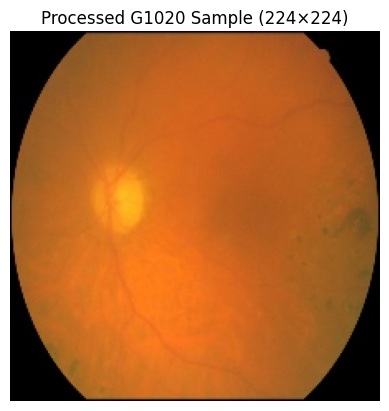

In [23]:
import cv2
import matplotlib.pyplot as plt

sample = os.listdir("../data/processed/g1020/training/glaucoma")[0]
path = os.path.join("../data/processed/g1020/training/glaucoma", sample)

img = cv2.imread(path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.title("Processed G1020 Sample (224×224)")
plt.axis("off")
plt.show()